<a href="https://colab.research.google.com/github/FransHutagalung/BootcampUsu/blob/main/Pertemuan4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown
!gdown --fuzzy "https://drive.google.com/file/d/1QSFZWQnKCLu3p0oKMQwFE6LQqDpVDy3U/view?usp=sharing"
!gdown --fuzzy "https://drive.google.com/file/d/1Bglflo-9I7BP-vm2KKLjrG1aD0q2RTih/view?usp=sharing"

Downloading...
From: https://drive.google.com/uc?id=1QSFZWQnKCLu3p0oKMQwFE6LQqDpVDy3U
To: /content/Iris.csv
100% 5.11k/5.11k [00:00<00:00, 14.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Bglflo-9I7BP-vm2KKLjrG1aD0q2RTih
To: /content/citrus.csv
100% 308k/308k [00:00<00:00, 49.3MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , classification_report , confusion_matrix , ConfusionMatrixDisplay

In [5]:
citrus_df = pd.read_csv("citrus.csv")
citrus_df.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [4]:
citrus_df['name'].unique()

array(['orange', 'grapefruit'], dtype=object)

In [7]:
iris_df = pd.read_csv("Iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
iris_df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [10]:
citrus_df['name'].value_counts()

,count
name,
orange,5000
grapefruit,5000


In [14]:
citrus_df.drop(columns=['name'])

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9
...,...,...,...,...,...
9995,15.35,253.89,149,77,20
9996,15.41,254.67,148,68,7
9997,15.59,256.50,168,82,20
9998,15.92,260.14,142,72,11


In [22]:
citrus_x_train , citrus_x_test , citrus_y_train , citrus_y_test = train_test_split( # menerima 4
    citrus_df.drop(columns=['name']),
    citrus_df['name'],
    test_size=0.2, # banyak data yang mau diuji
    random_state=42
)

In [19]:
citrus_x_train.head()

,diameter,weight,red,green,blue
9254,12.77,217.28,153,75,23
1561,7.87,143.57,159,86,19
1670,7.95,144.74,173,82,2
6087,10.53,182.24,158,74,14
6669,10.94,189.20,142,94,2


In [96]:
iris_x_train , iris_x_test , iris_y_train , iris_y_test = train_test_split( # menerima 4
    iris_df.drop(columns=['Species']), # Fitur | x
    iris_df['Species'], # Target / Label  | y
    test_size=0.2, # banyak data yang mau diuji
    random_state=42
)

independen latih , independen uji , dependen latih , dependen uji

In [21]:
iris_x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,23,4.6,3.6,1.0,0.2
15,16,5.7,4.4,1.5,0.4
65,66,6.7,3.1,4.4,1.4
11,12,4.8,3.4,1.6,0.2
42,43,4.4,3.2,1.3,0.2


In [45]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)


In [112]:
lr_model.fit(citrus_x_train , citrus_y_train)

LogisticRegression(max_iter=1000)

In [54]:
train_acc = accuracy_score(citrus_y_train , lr_model.predict(citrus_x_train))
test_acc = accuracy_score(citrus_y_test , lr_model.predict(citrus_x_test))
print(f"Hasil Train {train_acc*100:.2f}%")
print(f"Hasil Test {test_acc*100:.2f}%")

Hasil Train 95.60%
Hasil Test 95.00%


In [31]:
lr_model.predict(citrus_x_test)

array(['grapefruit', 'orange', 'orange', ..., 'grapefruit', 'orange',
       'grapefruit'], dtype=object)

In [114]:
lr_model.fit(iris_x_train , iris_y_train)

LogisticRegression(max_iter=1000)

In [98]:
train_acc = accuracy_score(iris_y_train , lr_model.predict(iris_x_train))
test_acc = accuracy_score(iris_y_test , lr_model.predict(iris_x_test))
print(f"Hasil Train {train_acc*100:.2f}%")
print(f"Hasil Test {test_acc*100:.2f}%")

Hasil Train 100.00%
Hasil Test 100.00%


In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2)

In [108]:
knn_model.fit(citrus_x_train , citrus_y_train)

KNeighborsClassifier(n_neighbors=2)

In [109]:
train_acc = accuracy_score(citrus_y_train , knn_model.predict(citrus_x_train))
test_acc = accuracy_score(citrus_y_test , knn_model.predict(citrus_x_test))
print("Akurasi dengan 3 tetangga")
print(f"Hasil Train {train_acc*100:.2f}%")
print(f"Hasil Test {test_acc*100:.2f}%")

Akurasi dengan 3 tetangga
Hasil Train 94.49%
Hasil Test 90.25%


In [102]:
knn_model.fit(iris_x_train , iris_y_train)

KNeighborsClassifier(n_neighbors=2)

In [75]:
train_acc = accuracy_score(iris_y_train , knn_model.predict(iris_x_train))
test_acc = accuracy_score(iris_y_test , knn_model.predict(iris_x_test))
print("Akurasi dengan 3 tetangga")
print(f"Hasil Train {train_acc*100:.2f}%")
print(f"Hasil Test {test_acc*100:.2f}%")

Akurasi dengan 3 tetangga
Hasil Train 100.00%
Hasil Test 100.00%


In [90]:
knn_model.classes_

array(['grapefruit', 'orange'], dtype=object)

In [111]:
cm = confusion_matrix(citrus_y_test , lr_model.predict(citrus_x_test) , labels=citrus_df['name'].unique())
display = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=citrus_df['name'].unique())
display.plot()
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- blue
- diameter
- green
- red
- weight
Feature names seen at fit time, yet now missing:
- Id
- PetalLengthCm
- PetalWidthCm
- SepalLengthCm
- SepalWidthCm


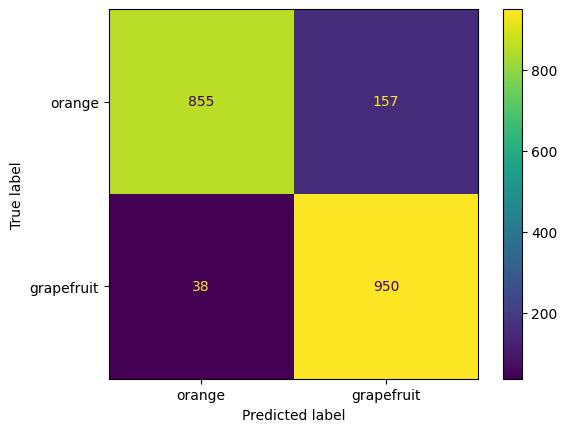

In [110]:
cm = confusion_matrix(citrus_y_test , knn_model.predict(citrus_x_test) , labels=citrus_df['name'].unique())
display = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=citrus_df['name'].unique())
display.plot()
plt.show()

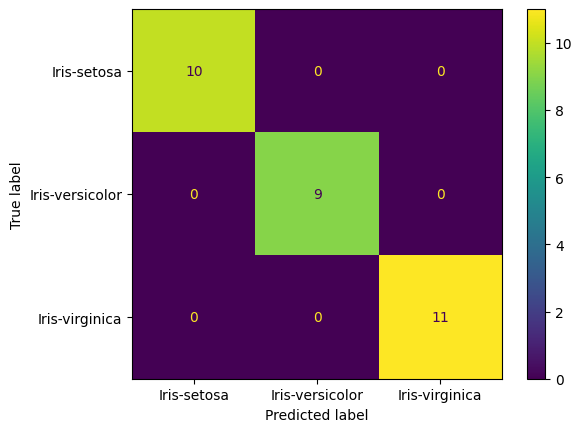

In [105]:
cm = confusion_matrix(iris_y_test , lr_model.predict(iris_x_test) , labels=iris_df['Species'].unique())
display = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=iris_df['Species'].unique())
display.plot()
plt.show()

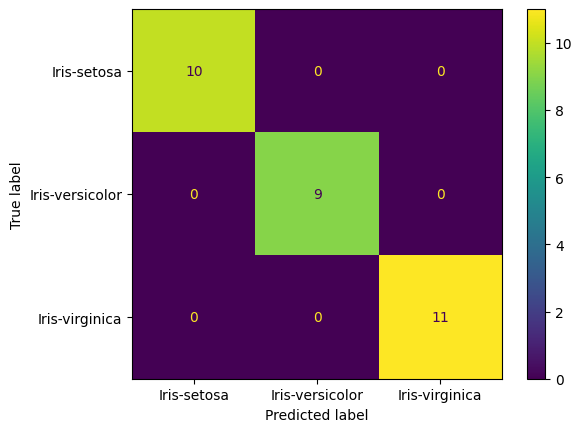

In [106]:
cm = confusion_matrix(iris_y_test , knn_model.predict(iris_x_test) , labels=iris_df['Species'].unique())
display = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=iris_df['Species'].unique())
display.plot()
plt.show()

Classification Reports

In [113]:
print(classification_report(citrus_y_test , lr_model.predict(citrus_x_test)))

              precision    recall  f1-score   support

  grapefruit       0.93      0.97      0.95       988
      orange       0.97      0.93      0.95      1012

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



In [115]:
print(classification_report(iris_y_test , lr_model.predict(iris_x_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

